In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy.stats as stats



receiving_2010 = pd.read_csv('data/Receiving_2010.csv')
receiving_2011 = pd.read_csv('data/Receiving_2011.csv')
receiving_2012 = pd.read_csv('data/Receiving_2012.csv')
receiving_2013 = pd.read_csv('data/Receiving_2013.csv')
receiving_2014 = pd.read_csv('data/Receiving_2014.csv')
receiving_2015 = pd.read_csv('data/Receiving_2015.csv')
receiving_2016 = pd.read_csv('data/Receiving_2016.csv')
receiving_2017 = pd.read_csv('data/Receiving_2017.csv')
receiving_2018 = pd.read_csv('data/Receiving_2018.csv')
receiving_2019 = pd.read_csv('data/Receiving_2019.csv')
receive_lst = [receiving_2010, receiving_2011, receiving_2012,receiving_2013,receiving_2014,receiving_2015,receiving_2016,receiving_2017,receiving_2018,receiving_2019]
receiving_2010.dtypes

Player     object
Tm         object
Age         int64
Pos        object
G           int64
GS          int64
Tgt         int64
Rec         int64
Ctch%      object
Yds         int64
Y/R       float64
TD          int64
1D          int64
Lng         int64
Y/Tgt     float64
R/G       float64
Y/G       float64
Fmb         int64
Height     object
Weight     object
dtype: object

In [2]:
def height_val(s):
    feet, inches = s.split('-')
    return int(feet)*12 + int(inches)

height_val('6-0')

72

In [3]:
receiving_2010.size
receiving_2010.head()

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Height,Weight
0,Roddy White*+,ATL,29,WR,16,16,179,115,64.2%,1389,12.1,10,73,46,7.8,7.2,86.8,1,6-0,211lb
1,Reggie Wayne*+,IND,32,WR,16,16,175,111,63.4%,1355,12.2,6,72,50,7.7,6.9,84.7,1,6-0,203lb
2,Jason Witten*+,DAL,28,TE,16,16,128,94,73.4%,1002,10.7,9,42,33,7.8,5.9,62.6,1,6-6,263lb
3,Santana Moss,WAS,31,WR,16,16,145,93,64.1%,1115,12.0,6,61,56,7.7,5.8,69.7,3,5-10,193lb
4,Larry Fitzgerald*,ARI,27,WR,16,15,173,90,52.0%,1137,12.6,6,58,41,6.6,5.6,71.1,0,6-3,218lb


In [4]:
for df in receive_lst:
    
    df['Height'] = df.Height.apply(height_val)
    df['Weight'] = df.Weight.str.slice(0,3).astype(float)
    df['BMI'] = 703 * df['Weight']/((df['Height'])**2)
    df.sort_values(by='Height', inplace=True)

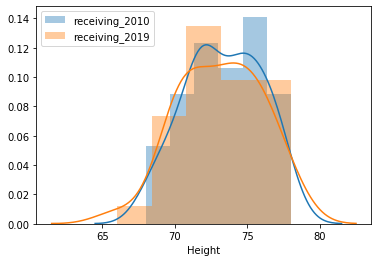

In [21]:
sns.distplot(receiving_2010.Height, label='receiving_2010')
sns.distplot(receiving_2019.Height, label='receiving_2019')
plt.legend()
plt.show()

In [8]:
past_decade = pd.concat(receive_lst)
past_decade

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,...,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Height,Weight,BMI
31,Mike Thomas,JAX,23,WR,16,11,102,66,64.7%,820,...,4,38,50,8.0,4.1,51.3,3,68,187.0,28.430147
30,Lance Moore,NOR,27,NaN,16,1,94,66,70.2%,763,...,8,40,80,8.1,4.1,47.7,2,69,187.0,27.612056
7,Wes Welker*,NWE,29,WR,15,11,123,86,69.9%,848,...,7,47,35,6.9,5.7,56.5,1,69,185.0,27.316740
3,Santana Moss,WAS,31,WR,16,16,145,93,64.1%,1115,...,6,61,56,7.7,5.8,69.7,3,70,193.0,27.689592
11,Davone Bess,MIA,25,wr,16,8,125,79,63.2%,820,...,5,42,29,6.6,4.9,51.3,3,70,190.0,27.259184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Austin Hooper*,ATL,25,TE,13,10,97,75,77.3%,787,...,6,41,35,8.1,5.8,60.5,0,76,254.0,30.914474
13,Zach Ertz*,PHI,29,TE,15,15,135,88,65.2%,916,...,6,50,30,6.8,5.9,61.1,1,77,250.0,29.642435
7,Travis Kelce*,KAN,30,TE,16,16,136,97,71.3%,1229,...,5,65,47,9.0,6.1,76.8,1,77,260.0,30.828133
11,Darren Waller,OAK,27,TE,16,16,117,90,76.9%,1145,...,3,53,75,9.8,5.6,71.6,1,78,255.0,29.464990


In [20]:
past_decade.Player.nunique()

198

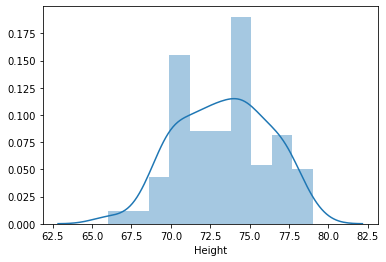

In [9]:
all_players = past_decade.groupby('Player').last().Height
sns.distplot(all_players)

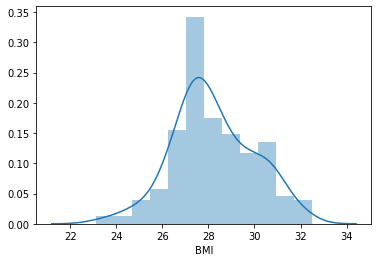

In [10]:
all_players = past_decade.groupby('Player').last().BMI
sns.distplot(all_players)

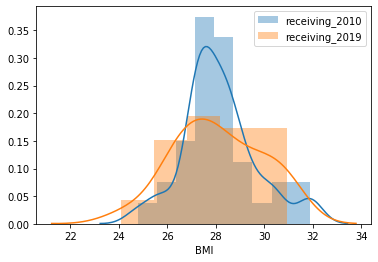

In [17]:
sns.distplot(receiving_2010.BMI, label='receiving_2010')
sns.distplot(receiving_2019.BMI, label='receiving_2019')
plt.legend()
plt.show()

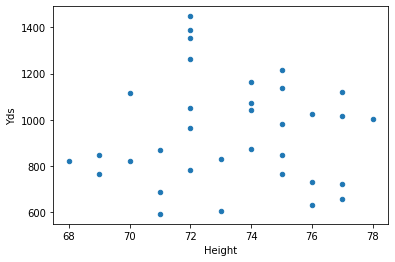

In [23]:
receiving_2010.plot.scatter('Height', 'Yds')

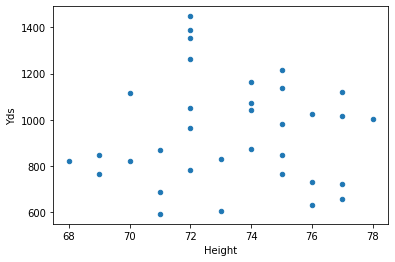

In [24]:
receiving_2010.plot.scatter('Height', 'Yds')

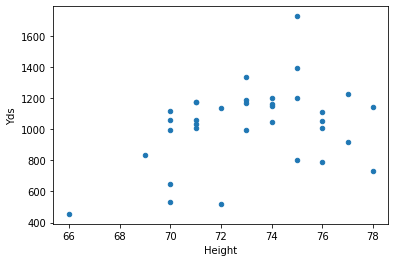

In [27]:
receiving_2019.plot.scatter('Height', 'Yds')

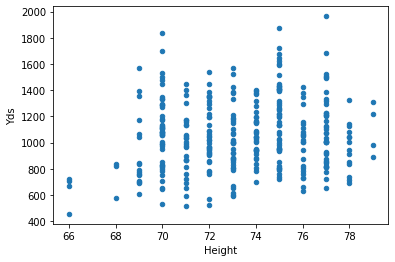

In [28]:
past_decade.plot.scatter('Height','Yds')

/Users/aneesshaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


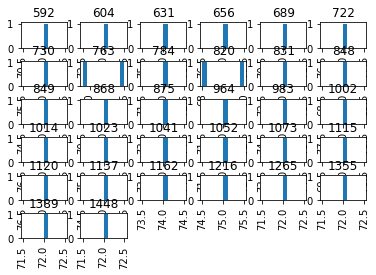

In [29]:
receiving_2010.hist('Height', 'Yds')
plt.tight_layout()

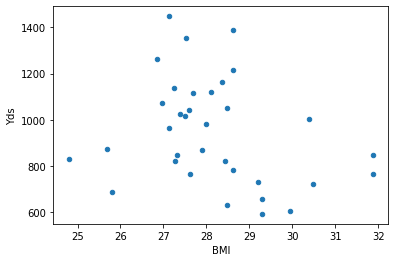

In [31]:
receiving_2010.plot.scatter('BMI', 'Yds')

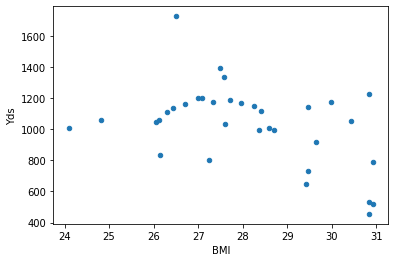

In [32]:
receiving_2019.plot.scatter('BMI', 'Yds')

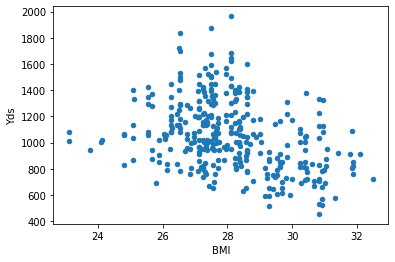

In [33]:
past_decade.plot.scatter('BMI','Yds')